### Question 1: Roberts, Sobel, Canny Edge Detector

In [28]:
import cv2
import numpy as np
from scipy import ndimage
from plot_utils import *

image = cv2.imread('retina2/172.bmp', cv2.COLOR_BGR2GRAY)

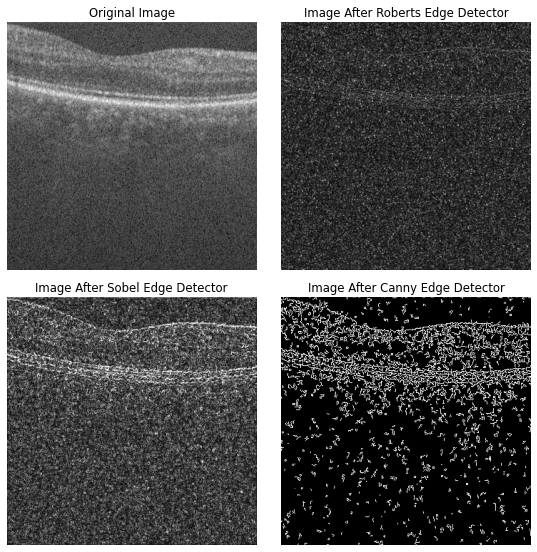

In [29]:
# Roberts Edge Detector
image_float = image.astype('float64')
image_float /= 255.0
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
roberts_y = ndimage.convolve(image_float, roberts_cross_v )
roberts_x = ndimage.convolve(image_float, roberts_cross_h )
  
roberts = np.sqrt( np.square(roberts_x) + np.square(roberts_y))
roberts*=255


# Sobel Edge Detector
sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))
sobel = cv2.bitwise_or(sobelX, sobelY)


# Canny Edge Detector
# sigma = 0.33
# # auto canny
# v = np.median(image)
# # apply automatic Canny edge detection using the computed median
# lower = int(max(0, (1.0 - sigma) * v))
# upper = int(min(255, (1.0 + sigma) * v))
# print(lower, upper)

canny = cv2.Canny(image, 100, 200, 3)

images = [[image_float, roberts], [sobel, canny]]
titles = [['Original Image', 'Image After Roberts Edge Detector'], ['Image After Sobel Edge Detector',
          'Image After Canny Edge Detector']]

plot_images(images, titles, dpi=70)

The canny detector is chosen to be the best edge detector.